In [5]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

[0.396484375, 0.4296875, 0.3984375, 0.390625, 0.392578125, 0.388671875, 0.4140625] [6, 12, 15, 20, 21, 88, 100]


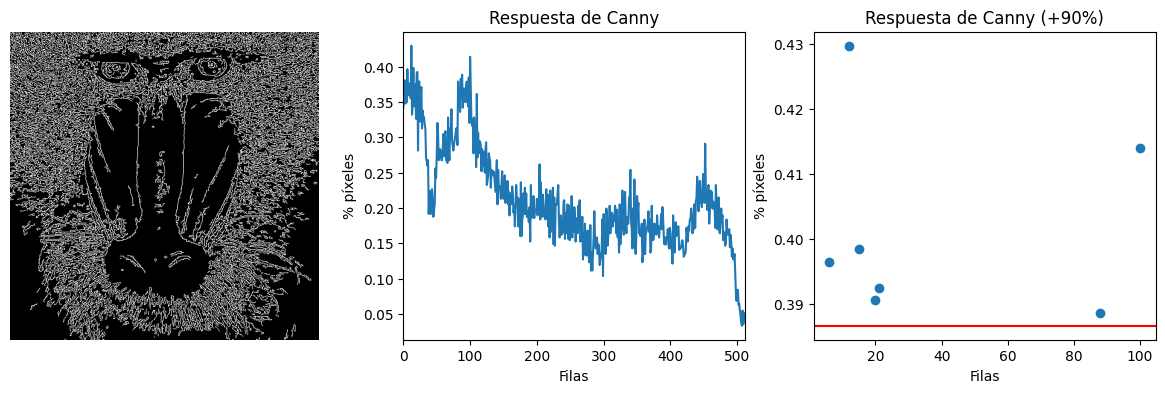

In [7]:
# El contenido de la imagen resultado de Canny, son valores 0 o 255
# Cuenta el número de píxeles blancos (255) por fila
# Suma los valores de los pixeles por fila
# Row
img = cv2.imread('mandril.jpg') 
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 200)
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Convierte el array de N arrays de 1 elemento en un array de N elementos
row_counts = row_counts.reshape((len(row_counts)))
# rows
rows = row_counts / (255 * canny.shape[0])

# Guardamos en 'maxfil' el valor máximo de blancos en para filas
maxfil = rows.max()
# Creamos un array para guardar las filas cuyo valor de blancos sea mayor que el 90% de 'maxfil'
max_rows_values = []
max_rows_indexes = []
for i in range(len(rows)):
    if rows[i] >= 0.9*maxfil:
        max_rows_values.append(float(rows[i]))
        max_rows_indexes.append(i)
print(max_rows_values, max_rows_indexes)

# Muestra Canny
fig, (ax1, ax2, ax3)= plt.subplots(1, 3, figsize=(15, 4))
ax1.set_axis_off()
ax2.set_title("Canny")
ax1.imshow(canny, cmap='gray') 

# Muestra píxeles blancos por filas
ax2.set_title("Respuesta de Canny")
ax2.set_xlabel("Filas")
ax2.set_ylabel("% píxeles")
ax2.plot(rows)
# Rango en x definido por las filas
ax2.set_xlim([0, len(row_counts)])

# Muestra valor de píxeles blancos mayores que el 90% de maxfil
ax3.set_title("Respuesta de Canny (+90%)")
ax3.set_xlabel("Filas")
ax3.set_ylabel("% píxeles")
ax3.axhline(maxfil*0.9, color='red')
x = np.array(max_rows_indexes)
y = np.array(max_rows_values)
ax3.plot(x, y, 'o')

TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.90*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen del mandril. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

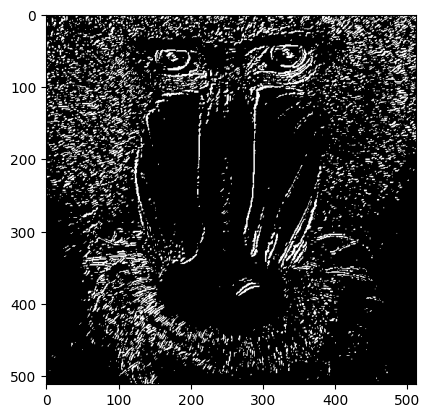

[0.18164062 0.25585938 0.27148438 0.30273438 0.29101562 0.27148438
 0.26367188 0.26367188 0.27734375 0.2109375  0.20703125 0.26367188
 0.265625   0.18164062 0.19140625 0.23632812 0.20898438 0.21875
 0.22851562 0.2421875  0.29101562 0.21875    0.19335938 0.25
 0.2734375  0.22460938 0.25       0.24609375 0.21289062 0.18554688
 0.16796875 0.20898438 0.1953125  0.14453125 0.14257812 0.13867188
 0.15625    0.1171875  0.15234375 0.18164062 0.125      0.08984375
 0.13671875 0.17773438 0.17773438 0.1328125  0.14648438 0.18359375
 0.19335938 0.16015625 0.23828125 0.29492188 0.2734375  0.23632812
 0.18945312 0.20507812 0.2109375  0.20117188 0.203125   0.1953125
 0.19726562 0.15820312 0.203125   0.19921875 0.203125   0.17773438
 0.16210938 0.2109375  0.20117188 0.1796875  0.18554688 0.21289062
 0.2421875  0.2578125  0.22851562 0.234375   0.203125   0.20703125
 0.21679688 0.26953125 0.26757812 0.296875   0.31445312 0.30078125
 0.26367188 0.26757812 0.2421875  0.26953125 0.2578125  0.18554688
 0.23

In [ ]:
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

valor_umbral = 130

_, imagenUmbralizada = cv2.threshold(cv2.convertScaleAbs(sobel), valor_umbral, 255, cv2.THRESH_BINARY)
plt.imshow(imagenUmbralizada, cmap='gray')
plt.show()

col_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
cols = col_counts / (255 * imagenUmbralizada.shape[1])

row_counts = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
row_counts = row_counts.reshape((len(row_counts)))
rows = row_counts / (255 * imagenUmbralizada.shape[0])




In [3]:
import cv2

vid = cv2.VideoCapture(0)
modo = 0

while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if not ret:
        break
    
    # Convertir a escala de grises
    gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if modo == 0:
        salida = frame.copy()
        texto = "Modo 0: Imagen original"
    
    elif modo == 1:
        _, salida = cv2.threshold(gris, 130, 255, cv2.THRESH_BINARY)
        texto = "Modo 1: Umbralizacion"
    
    elif modo == 2:
        ggris = cv2.GaussianBlur(gris, (3, 3), 0)
        sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)
        sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)
        sobel = cv2.convertScaleAbs(cv2.add(sobelx, sobely))
        salida = sobel
        texto = "Modo 2: Bordes Sobel"

    cv2.putText(salida, texto, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 
                1, (255, 255, 255), 2, cv2.LINE_AA)
    
    # Mostrar la ventana
    cv2.imshow("Resultado", salida)

    # Detenemos pulsando ESC
    if cv2.waitKey(20) == 27:
        break
    # Cambiamos entre modos, si pulsa d avanzo a la derecha
    # Si pulso a retrocedo
    elif cv2.waitKey(1) == ord('d'):
        modo = (modo + 1) % 3 
    elif cv2.waitKey(1) == ord('a'):
        modo = (modo - 1) % 3

# Liberar el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()
